<img src=http://blaze.github.io/images/blaze.png align=right>

Time Series with dask.dataframe
==================

[Dask.dataframe](dask.pydata.org/en/latest/dataframe.html) inherits timeseries functionality from Pandas.  

This notebook shows off a few time series functions on artificial but moderately large data. Be aware that performance can fluctuate since this is hosted on a shared machine with only one accessible core. A static notebook with more data and profiling on a larger machine can be viewed [here](http://nbviewer.ipython.org/github/blaze/dask-examples/blob/master/time-series.ipynb).

The interface should look familiar to existing Pandas users.

Setup
------

We import dask.dataframe and set up a progress bar to measure performance.

In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

progress_bar = ProgressBar()
progress_bar.register()   # turn on progressbar globally

In [2]:
%matplotlib inline

Random data
-------------

We construct some random data.


In [3]:
import dask.dataframe as dd

df = dd.demo.make_timeseries(start='2000', end='2005', dtypes={'A': float, 'B': int},
                             freq='1s', partition_freq='3M', seed=1234)
df.head()

[########################################] | 100% Completed |  1.3s


,A,B
2000-01-31 00:00:00,-0.391541,1014
2000-01-31 00:00:01,0.742456,970
2000-01-31 00:00:02,-0.076128,1000
2000-01-31 00:00:03,0.330338,919
2000-01-31 00:00:04,-0.527135,1028


Base Data on Disk
--------------------

This will stop us from having to recompute the same random numbers constantly.  Reading from disk ends up being a bit faster.

In [4]:
c = df.to_castra()
df = c.to_dask()

[########################################] | 100% Completed | 31.6s


Cumulative Sum, datetime resampling, and plotting
--------------------------------------------------------

We compute the cumulative sum of the `A` column.  This will look like typical Brownian motion / a ticker plot.  However the resolution of one second over 15 years is too big to give to matplotlib so instead we resample to weekly values.  Finally we compute the result as a (small) pandas DataFrame and use Pandas and matplotlib to plot the results.

[########################################] | 100% Completed | 14.4s


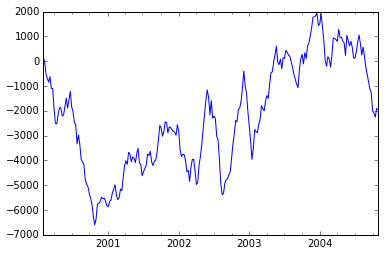

In [5]:
df.A.cumsum().resample('1w', how='mean').compute().plot()

## What was our computational bandwidth?

In [6]:
duration = progress_bar.last_duration
nbytes = df.A.nbytes.compute()

[########################################] | 100% Completed |  3.3s


In [7]:
nbytes / 1e6 / duration  # MB/s

83.27724734662965